# How to use inferential statistics?

In [110]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp

## DataSet ---------> Titanic 

In [115]:
data_people_money = pd.read_csv(r'I:\Python\dataSet\ml\titanic\train.csv')
data = data_people_money.copy()
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Confidence Intervals
* A point estimate can give you a rough idea of a population parameter like the mean, but estimates are prone to error and taking multiple samples to get improved estimates may not be feasible. A confidence interval is a range of values above and below a point estimate that captures the true population parameter at some predetermined confidence level. For example, if you want to have a 95% chance of capturing the true population parameter with a point estimate and a corresponding confidence interval, you'd set your confidence level to 95%. Higher confidence levels result in a wider confidence intervals.
* For quantitative data

* Check if our data is normal or not by Shapiro

In [60]:
from scipy.stats import shapiro
# normality test
s, p = shapiro(data['Age'])
print('p=%.3f' % (p))
# interpret results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

p=1.000
Sample looks Gaussian (fail to reject H0)


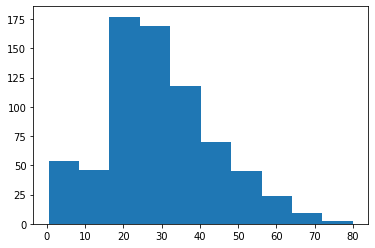

In [62]:
plt.hist(data['Age'])
plt.show()

* Take sample from data 
* calculate the sample mean
* If you know std of population then we will use z_test , else: we will use t_test 
* margin_error_z = z_score * (population_std / sqrt(len(sample)))
* margin_error_t = t_score * (sample_std / sqrt(len(sample)))
* ci_z = [sample_mean - margin_error_z, sample_mean + margin_error_z]
* ci_t = [sample_mean - margin_error_t, sample_mean + margin_error_t]

In [46]:
sample = data['Age'].sample(frac=0.5)
sample_mean = sample.mean()
sample_mean

29.63888888888889

In [56]:
z_score = stats.norm.ppf(0.975) # 95% of confidence interval (knowing population std)

df = len(sample) - 1 # degree of freedom

t_score = stats.t.ppf(0.975, df= df) # 95% of confidence interval (Unknowing population std)

std = np.std(data['Age']) # std of population
std_sample = np.std(data['Age'], ddof=1) # std of sample

mean = np.mean(data['Age']) # mean of population ~= mean of sample

print(f'Z:{z_score}, Std:{std} and mean:{mean}')
print(f'T:{t_score}, Std:{std_sample} and mean:{mean}')

Z:1.959963984540054, Std:14.516321150817316 and mean:29.69911764705882
T:1.965309213413216, Std:14.526497332334042 and mean:29.69911764705882


In [65]:
# margin_error_z
margin_error = z_score * (std / np.sqrt(len(sample))) 
ci = [sample_mean - margin_error, sample_mean + margin_error]
print(f'True mean of population is {mean}')
print(f'95% of confidence interval of mean is between {ci}')

True mean of population is 29.69911764705882
95% of confidence interval of mean is between [28.29167289706021, 30.98610488071757]


In [66]:
# margin_error_t
margin_error = t_score * (std_sample / np.sqrt(len(sample)))
ci = [sample_mean - margin_error, sample_mean + margin_error]
print(f'True mean of population is {mean}')
print(f'95% of confidence interval of mean is between {ci}')

True mean of population is 29.69911764705882
95% of confidence interval of mean is between [28.287051762880203, 30.990726014897575]


* Instead of calculating a confidence interval for a mean point estimate by hand, you can calculate it using the Python function stats.t.interval():

In [96]:
sigma = (std_sample / np.sqrt(len(sample)))
ci = stats.t.interval(alpha=0.95, df=df, loc= sample_mean, scale=sigma)
print(f'95% of confidence interval of mean is between {ci}')

95% of confidence interval of mean is between (28.287051762880203, 30.990726014897575)


# Confidence intervals for proportion (One sample)
* For qualitative data

In [71]:
data['Sex'].value_counts(normalize=True) 

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [94]:
p = (data['Sex'] == 'male').mean()
z_critical = stats.norm.ppf(0.975)
n = len(sample)
margin_of_error = z_critical * np.sqrt((p*(1-p))/n)

confidence_interval = (p - margin_of_error,  # Calculate the the interval
                       p + margin_of_error) 

print(f'There is a 95% chance that the true population proportion lies somewhere between  {confidence_interval}')

There is a 95% chance that the true population proportion lies somewhere between  (0.6032510646519731, 0.6919228971886555)


* Instead of calculating a confidence interval for proportion by hand, you can calculate it using the Python function stats.norm.interval():

In [93]:
confidence_interval = stats.norm.interval(alpha = 0.95,    # Confidence level             
                   loc =  p,     # Point estimate of proportion
                   scale = np.sqrt((p*(1-p))/n))  # Scaling factor
print(f'There is a 95% chance that the true population proportion lies somewhere between  {confidence_interval}')

There is a 95% chance that the true population proportion lies somewhere between  (0.6032510646519731, 0.6919228971886555)


#  Confidence intervals for proportion (Two sample) 

* confidence_interval = p1 - p2 +- z * sqrt((p1 * (1 - p1) / n1) + (p2 * (1 - p2) / n2))

In [90]:
p1 = (data['Sex'] == 'male').mean()
p2 = (data['Sex'] == 'female').mean()

n1 = (data['Sex'] == 'male').count()
n2 = (data['Sex'] == 'female').count()

p_diff = p1 - p2
z = stats.norm.ppf(0.957)

margin_error = z * np.sqrt( ((p1 * (1 - p1)) / n1) + ((p2 * (1 - p2)) / n2) )
ci = [p_diff - margin_error, p_diff + margin_error]
print(f'There is a 95% chance that the true population proportion lies somewhere between {ci}')

There is a 95% chance that the true population proportion lies somewhere between [0.25631487092525507, 0.33403305275600204]


# Hypothesis testing

## T_Test for One Sample
* Step by Step

In [281]:
alpha = 0.05

d = data[['Age', 'Fare']].dropna()
pop_mean = d['Age'].mean()
std_pop = d['Age'].std()

sample = d['Age'].sample(n=400)
sample_mean = sample.mean()
std_sample =  np.std(sample)

t_test = (sample_mean - pop_mean) / (std_sample / np.sqrt(len(sample)))
p_value = 2 * (1 - stats.t.cdf(t_test, df = len(sample) - 1))

print(f't_test is {t_test} and p_value is {p_value}')
      
if p_value <= alpha:
    print('Reject H0, the sample_mean is not the same of pop_mean')
else:
    print('Fail to Reject H0, the sample_mean is the same of pop_mean')    

t_test is 0.14902356499528882 and p_value is 0.8816103289444732
Fail to Reject H0, the sample_mean is the same of pop_mean


* Using the Method

In [282]:
t = stats.ttest_1samp(a = sample, popmean= pop_mean)
t

Ttest_1sampResult(statistic=0.14883716896862595, pvalue=0.8817573150486813)

## T_Test for Two Sample
* Step by Step

In [367]:
alpha = 0.05

d = data[['Age', 'Fare']].dropna()

# sample 1
sample_age = d['Age'].sample(n=400)
sample_age_mean = sample_age.mean()
sample_age_std = sample_age.std()
sample_age_size = len(sample_age)

# sample 2
sample_fare = d['Fare'].sample(n=400)
sample_fare_mean = sample_fare.mean()
sample_fare_std = sample_fare.std()
sample_fare_size = len(sample_fare)

df = (sample_age_size + sample_fare_size) - 2
numerator = sample_age_mean - sample_fare_mean
denominator = np.sqrt((sample_age_std**2 / sample_age_size) + (sample_fare_std**2 / sample_fare_size))

t_test = numerator / denominator
p_value = 2 * (1 - stats.t.cdf(abs(t_test), df = df))
print(f't_test is {t_test} and p_value is {p_value}')

if p_value <= alpha:
    print('Reject H0, the sample_mean 1 is not the same of sample_mean 2 ')
else:
    print('Fail to Reject H0, the sample_mean 1 is the same of sample_mean 2 ')    

t_test is -2.6483258716414158 and p_value is 0.008248932340833015
Reject H0, the sample_mean 1 is not the same of sample_mean 2 


* Using the Method

In [368]:
t = stats.ttest_ind(a = sample_age, b = sample_fare, equal_var = False)
t

Ttest_indResult(statistic=-2.6483258716414153, pvalue=0.008373252445366198)

## Confidence interval for 2 sample

In [369]:
ci = stats.t.interval(alpha=1 - alpha, df=df, loc= numerator, scale=denominator)
ci

(-13.610566430028435, -2.0229740699715597)

## Paired Test
* It is used when the samples are paired. For example, we are experimenting with a new exercise on people and we took samples of after and before effects of the exercise. Now we want to find out whether this exercise is beneficial or not. We will use paired t-tests to find out the differences because the samples are connected.
* H0 : There is no change after the tuition (x̄1= x̄2)
* H1 : There is a change after the tuition (x̄1!= x̄2)

In [370]:
# create data and add it on main data
befor = stats.norm.rvs(scale=30, loc=250, size=714)
after = befor + stats.norm.rvs(scale=5, loc=-1.25, size=714)
d['before'] = befor
d['after'] = after

In [371]:
d.head()

,Age,Fare,before,after
0,22.0,7.2500,225.931377,223.047269
1,38.0,71.2833,237.780796,235.098087
2,26.0,7.9250,260.259776,263.331358
3,35.0,53.1000,320.295769,312.530929
4,35.0,8.0500,212.922570,205.618260


In [372]:
alpha = 0.05
t, p_value = stats.ttest_rel(a = d['before'], b = d['after'])
if p_value <= alpha:
    print('Reject H0, There is change after the tuition')
else:
    print('Fail to Reject H0, There is no change after the tuition')  

Reject H0, There is change after the tuition


## ANOVA...
* Testing for difference between groups for numerical values

## Chi_squared
* Testing for relationships between categorical variables